# Hate speech classification

In [1]:
# Importing all the model required

import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import matplotlib.mlab as mlab
import plotly.express as px
import seaborn as sb
import gensim as ge
import pyLDAvis.gensim_models
import warnings
warnings.filterwarnings("ignore")



from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats
import nltk
from nltk import word_tokenize,sent_tokenize
from nltk.corpus import stopwords

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
from collections import Counter,OrderedDict
import ast
output_notebook()


import nltk
import re
import string
from string import punctuation
from gensim import corpora,models,similarities
%matplotlib inline

Loading BokehJS ...

In [2]:
# loading data
df = pd.read_csv('hate_speech.csv')
df.shape

(24783, 7)

## Exploratory Data Analysis (EDA) and Feature Engineering

In [3]:
df.head() # Columns are shown in rows for easy reading

,Unnamed: 0,count,hate_speech,offensive_language,neither,speech,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
df.shape

(24783, 7)

In [5]:
df.head(2).T # Columns are shown in rows for easy reading

,0,1
Unnamed: 0,0,1
count,3,3
hate_speech,0,0
offensive_language,0,3
neither,3,0
speech,2,1
tweet,!!! RT @mayasolovely: As a woman you shouldn't...,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...


In [6]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
speech                0
tweet                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   speech              24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [8]:
df.isna().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
speech                0
tweet                 0
dtype: int64

In [9]:
df['speech'].unique()

array([2, 1, 0], dtype=int64)

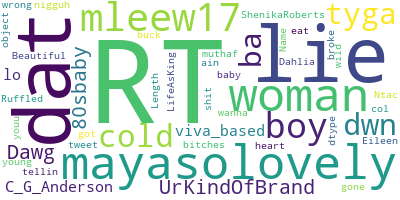

In [10]:
# Importing word cloud
from wordcloud import WordCloud

#Creating wordcloud object
wordcloud=WordCloud(background_color='white',max_words=5000,contour_width=6,contour_color='grey')

#Generating wordcloud 
wordcloud.generate(str(df['tweet']))

wordcloud.to_image()

In [11]:
# Percentage of complaints with text
total = df['speech'].notnull().sum()
round((total/len(df)*100),1)

100.0

<AxesSubplot:xlabel='speech', ylabel='count'>

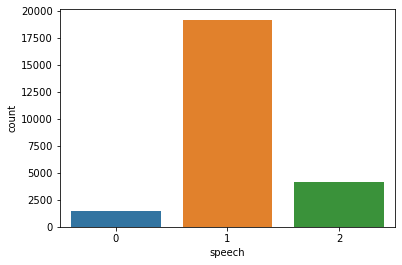

In [12]:
sns.countplot('speech',data=df)

In [13]:
df2=df.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)

## Text Classification

In [14]:
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

In [15]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [16]:
df

,speech,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [17]:
df['tweet']=df['tweet'].apply(clean_text)

In [18]:
df['type'] = df['speech']
df

,speech,tweet,type
0,2,rt mayasolov woman shouldnt complain clean ho...,2
1,1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,1
2,1,rt urkindofbrand dawg rt ever fuck bitch sta...,1
3,1,rt cganderson vivabas look like tranni,1
4,1,rt shenikarobert shit hear might true might f...,1
...,...,...,...
24778,1,yous muthafin lie coreyemanuel right tl tras...,1
24779,2,youv gone broke wrong heart babi drove redneck...,2
24780,1,young buck wanna eat dat nigguh like aint fuck...,1
24781,1,youu got wild bitch tellin lie,1


In [19]:
df2=df

In [20]:
df2['type']=df['type'].replace(0,'Hate speech')

In [21]:
df2['type']=df['type'].replace(1,'Offensive speech')

In [22]:
df2['type']=df['type'].replace(2,'Normal speech')

In [23]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

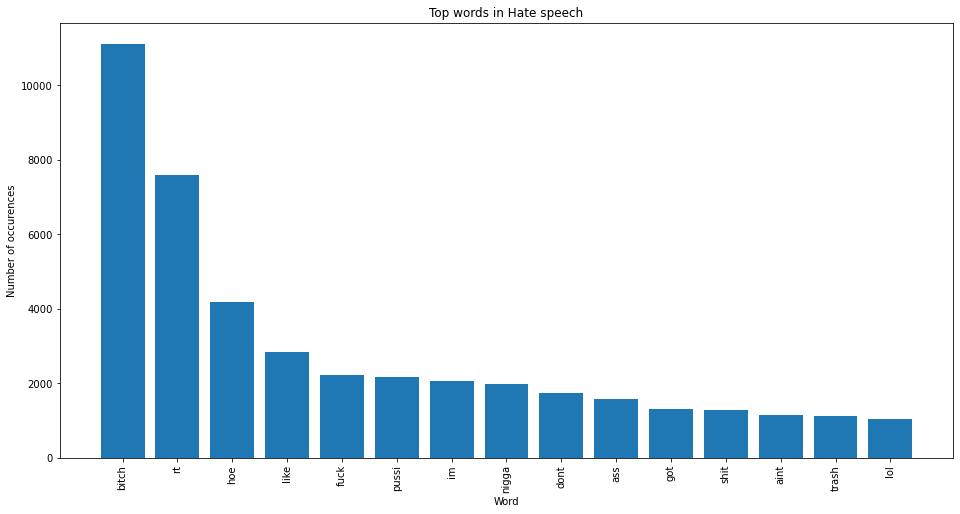

In [24]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df['tweet'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in Hate speech');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [25]:
tweet_text = [TextBlob(df['tweet'][i]).pos_tags for i in range(df['tweet'].shape[0])]

In [26]:
tweet_text_df = pd.DataFrame({'tweet_text':tweet_text})

word_counts = [] 
pos_counts = {}

for headline in tweet_text_df[u'tweet_text']:
    word_counts.append(len(headline))
    for tag in headline:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per tweet: ', np.mean(word_counts))

Total number of words:  208472
Mean number of words per tweet:  8.411895250776743


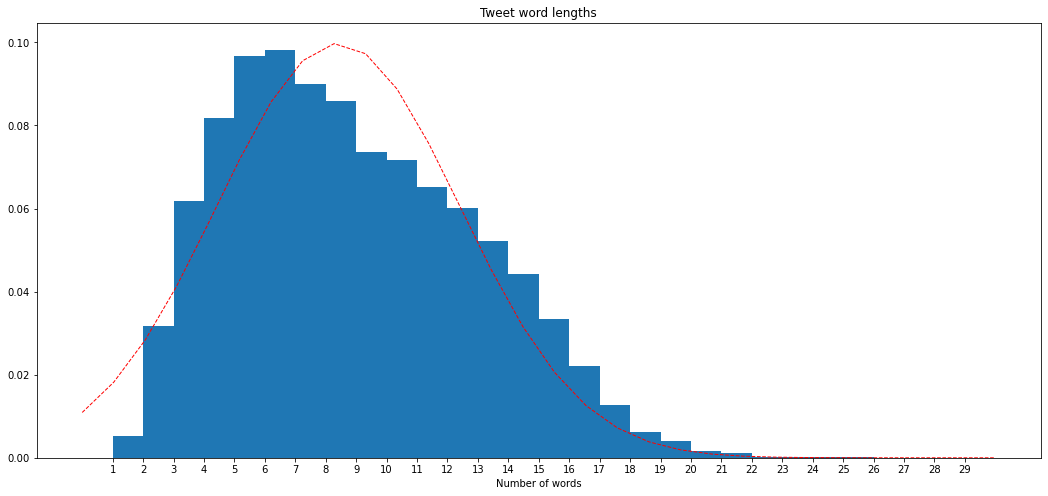

In [27]:
y = stats.norm.pdf(np.linspace(0,30,30), np.mean(word_counts), np.std(word_counts))

fig, ax = plt.subplots(figsize=(18,8))
ax.hist(word_counts, bins=range(1,30), density=True);
ax.plot(np.linspace(0,30,30), y, 'r--', linewidth=1);
ax.set_title('Tweet word lengths');
ax.set_xticks(range(1,30));
ax.set_xlabel('Number of words');
plt.show()

In [28]:

small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = df['tweet'].sample(n=500, random_state=0).values

print('Tweet before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Tweet after vectorization: \n{}'.format(small_document_term_matrix[123]))

Tweet before vectorization: bernadettvajda alway put ginger red yellow leopard print
Tweet after vectorization: 
  (0, 121)	1
  (0, 31)	1
  (0, 580)	1
  (0, 1242)	1
  (0, 1757)	1
  (0, 870)	1
  (0, 1195)	1


In [29]:
#number of topics
n_topics = 3

# Latent Semantic Analysis (LSA)

In [30]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [31]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [32]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [33]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [34]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  bitch rt like fuck im ass pussi nigga lol dont
Topic 2:  cunt use stupid rt peopl littl faggot watch word bobhel
Topic 3:  rt hoe trash nigga pussi play love im like yall


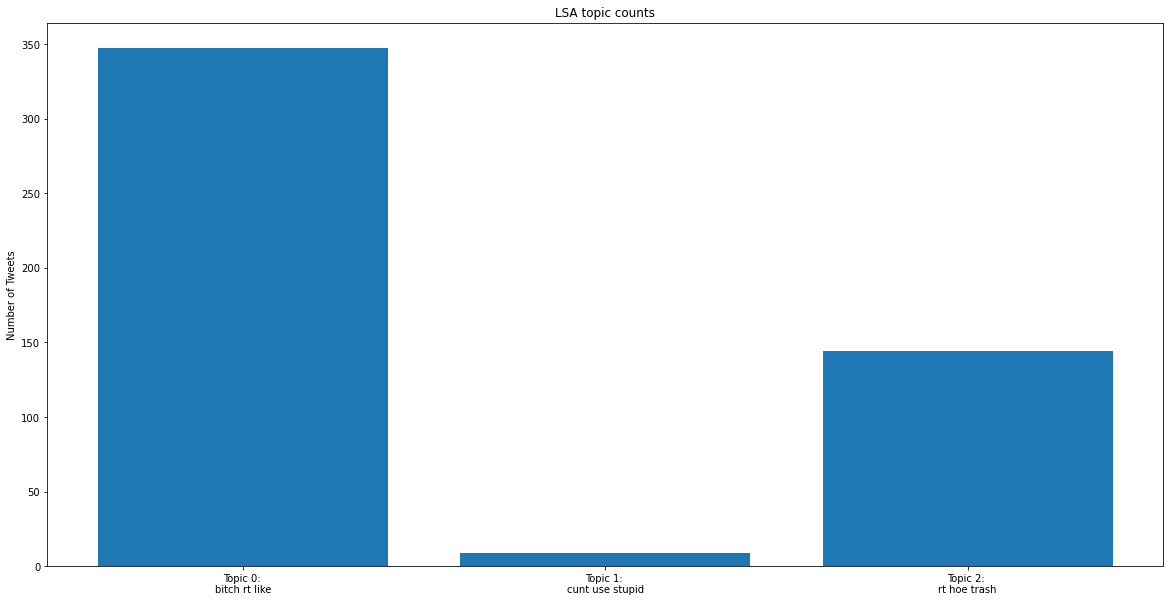

In [35]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Tweets');
ax.set_title('LSA topic counts');
plt.show()

In [36]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.001s...
[t-SNE] Computed neighbors for 500 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.050685
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.829365
[t-SNE] KL divergence after 2000 iterations: 0.104593


In [37]:
# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [38]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [39]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

# Latent Dirichilet Allocation

In [40]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [41]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [42]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  bitch rt like lol fuck hoe got ass hate dont
Topic 2:  bitch rt cunt amp hoe nigga like shit im ass
Topic 3:  rt bitch hoe like pussi nigga im fuck trash look


In [43]:

tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.001s...
[t-SNE] Computed neighbors for 500 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.017535
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.646618
[t-SNE] KL divergence after 1050 iterations: 0.100276


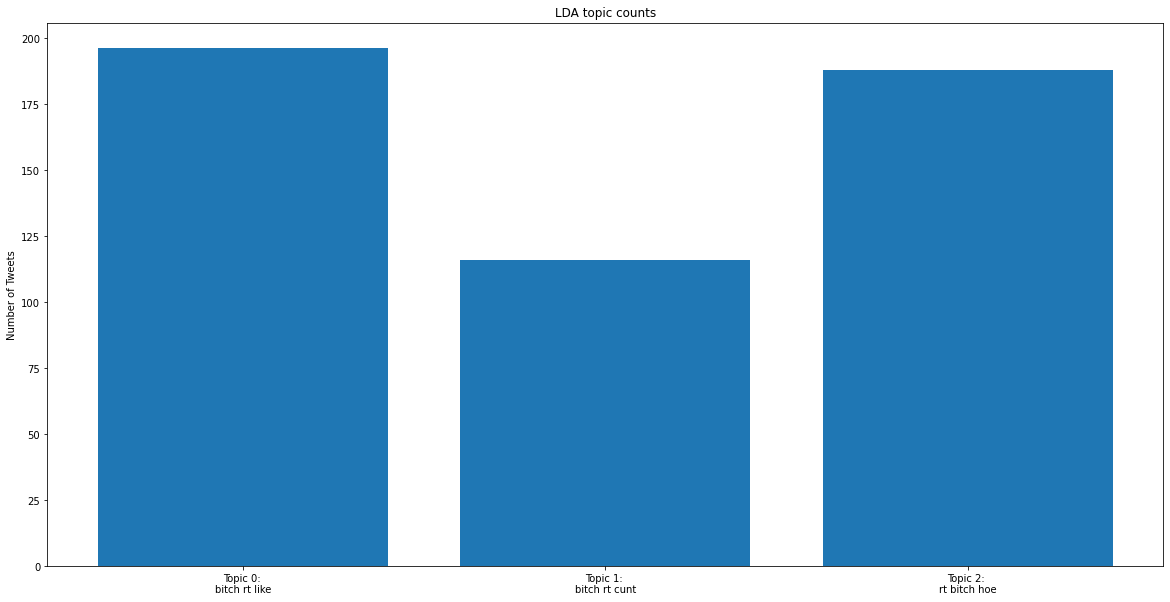

In [44]:
top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of Tweets');

In [45]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.000s...
[t-SNE] Computed neighbors for 500 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.017535
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.646618
[t-SNE] KL divergence after 1050 iterations: 0.100276


In [46]:
top_3_words_lda = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

In [47]:
# Preparing a corpus for analysis and checking the first 5 entries
corpus=[]

corpus = df['tweet'].to_list()

corpus[:5]

[' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
 ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place',
 ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit',
 ' rt cganderson vivabas look like tranni',
 ' rt shenikarobert shit hear might true might faker bitch told ya ']

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nup_2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
# removing common words and tokenizing
stoplist = stopwords.words('english') + list(punctuation) + list("([)]?") + [")?"]

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

dictionary = corpora.Dictionary(texts)

In [50]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [51]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

In [52]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

In [53]:
#I will try 5 topics
total_topics = 5

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tf

In [54]:
lda.show_topics(total_topics,5)

[(0, '0.031*"trash" + 0.028*"bitch" + 0.019*"rt" + 0.018*"u" + 0.010*"white"'),
 (1,
  '0.059*"rt" + 0.034*"bitch" + 0.024*"pussi" + 0.023*"hoe" + 0.016*"dont"'),
 (2, '0.103*"bitch" + 0.029*"rt" + 0.020*"like" + 0.016*"fuck" + 0.014*"im"'),
 (3,
  '0.075*"rt" + 0.029*"hoe" + 0.013*"faggot" + 0.010*"retard" + 0.010*"cunt"'),
 (4,
  '0.053*"bitch" + 0.040*"hoe" + 0.032*"rt" + 0.022*"nigga" + 0.016*"like"')]

In [55]:
data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}

In [56]:
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(5, 76)


In [57]:
df_lda

,trash,bitch,rt,u,white,ur,im,talk,charli,make,...,man,nigguh,trust,nigger,sex,god,want,realli,cant,wit
0,0.03113,0.028097,0.018691,0.017788,0.009651,0.00918,0.008929,0.007545,0.006398,0.005813,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.033672,0.058861,0.000000,0.000000,0.00000,0.006382,0.000000,0.000000,0.003825,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.103362,0.028550,0.004507,0.000000,0.00000,0.014398,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.005374,0.074661,0.000000,0.000000,0.00000,0.003562,0.000000,0.000000,0.000000,...,0.004451,0.004126,0.00407,0.003978,0.003587,0.003507,0.000000,0.000000,0.000000,0.000000
4,0.00000,0.052862,0.032356,0.007646,0.000000,0.00000,0.007064,0.004799,0.000000,0.004515,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.007036,0.005777,0.005498,0.005061


In [58]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim_models.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  41.651901
2       51.163364 -159.968018       2        1  28.090236
4      -73.144554   21.523815       3        1  10.120396
3      -66.410133 -110.606438       4        1  10.105736
0       54.417324   12.443444       5        1  10.031732, topic_info=      Term         Freq        Total Category  logprob  loglift
20   bitch  1283.000000  1283.000000  Default  30.0000  30.0000
18     hoe   417.000000   417.000000  Default  29.0000  29.0000
7       rt  1120.000000  1120.000000  Default  28.0000  28.0000
10   trash   124.000000   124.000000  Default  27.0000  27.0000
84   nigga   183.000000   183.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
551   play     7.215167    37.255244   Topic5  -5.8423   0.6578
104   dont     8.972328   252.194483   Topic5  -5.6244  -1.0366
248  think     7.783365    73.049391   Topic5  -5.7665   0.0603
62     get     7.822848   218.789221   Topic5  -5.7614  -1.0316
185   call     7.034544    60.550364   Topic5  -5.8677   0.1468

[401 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1518      5  1.023896  action
3904      3  1.135769     ago
1406      3  0.902677      ah
138       1  0.096461    aint
138       2  0.313500    aint
...     ...       ...     ...
316       1  0.031395      yo
316       2  0.784875      yo
316       3  0.156975      yo
316       4  0.015698      yo
2159      2  0.881006  youtub

[641 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 5, 4, 1])

# Text Preprocessing


In [59]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df.tweet).toarray()

labels = df.speech

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 24783 complaints is represented by 6397 features (TF-IDF score of unigrams and bigrams)


# Multi-Classification models
The classification models evaluated are:

* Random Forest
* Linear Support Vector Machine
* Multinomial Naive Bayes
* Logistic Regression.

## Spliting the data into train and test sets

In [60]:
X = df['tweet'] # Collection of documents
y = df['speech'] # Target or the labels we want to predict (i.e., the 3 different complaints of Hate Speech)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

## Models

In [61]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

### Comparison of model performance

In [62]:

mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.889360,0.009628
LogisticRegression,0.896744,0.008274
MultinomialNB,0.848364,0.006965
RandomForestClassifier,0.774321,0.000086


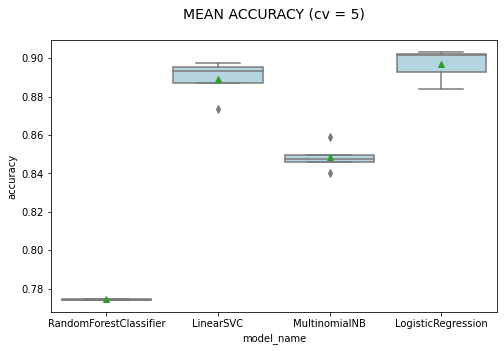

In [63]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

## Model Evaluation


In [64]:

X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [65]:
df2

,speech,tweet,type
0,2,rt mayasolov woman shouldnt complain clean ho...,Normal speech
1,1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive speech
2,1,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive speech
3,1,rt cganderson vivabas look like tranni,Offensive speech
4,1,rt shenikarobert shit hear might true might f...,Offensive speech
...,...,...,...
24778,1,yous muthafin lie coreyemanuel right tl tras...,Offensive speech
24779,2,youv gone broke wrong heart babi drove redneck...,Normal speech
24780,1,young buck wanna eat dat nigguh like aint fuck...,Offensive speech
24781,1,youu got wild bitch tellin lie,Offensive speech


# Precision, Recall, F1-score

In [66]:
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df2['type'].unique()))

				CLASSIFICATIION METRICS

                  precision    recall  f1-score   support

   Normal speech       0.55      0.25      0.34       370
Offensive speech       0.92      0.95      0.94      4818
     Hate speech       0.81      0.85      0.83      1008

        accuracy                           0.89      6196
       macro avg       0.76      0.68      0.70      6196
    weighted avg       0.88      0.89      0.88      6196



## Predictions

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [68]:

tweet = """I will kill you"""
num=model.predict(fitted_vectorizer.transform([tweet]))
if num == 0:
    print("Hate Speech")
elif num == 1:
    print("Offensive Speech")
else:
    print("Normal Speech")

Hate Speech


In [69]:

tweet2 = """I hate this country"""
num=model.predict(fitted_vectorizer.transform([tweet2]))
if num == 0:
    print("Hate Speech")
elif num == 1:
    print("Offensive Speech")
else:
    print("Normal Speech")

Offensive Speech


In [70]:
tweet3 = """Have a nice day"""
num=model.predict(fitted_vectorizer.transform([tweet3]))
if num == 0:
    print("Hate Speech")
elif num == 1:
    print("Offensive Speech")
else:
    print("Normal Speech")

Normal Speech


In [71]:

tweet4 = """You pice of shit"""
num=model.predict(fitted_vectorizer.transform([tweet4]))
if num == 0:
    print("Hate Speech")
elif num == 1:
    print("Offensive Speech")
else:
    print("Normal Speech")

Offensive Speech


In [72]:
tweet5 = """She's got to get pregnant first and *then* Robyn gets to have that *sweet sweet* titty milk"""
num=(model.predict(fitted_vectorizer.transform([tweet5])))
if num == 0:
    print("Hate Speech")
elif num == 1:
    print("Offensive Speech")
else:
    print("Normal Speech")

Offensive Speech
